In [1]:
from PIL import Image
import pytesseract
import numpy as np
import cv2

In [2]:
from matplotlib import pyplot as plt
image_file = "ocr test.jpeg"
img = cv2.imread(image_file)

In [3]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

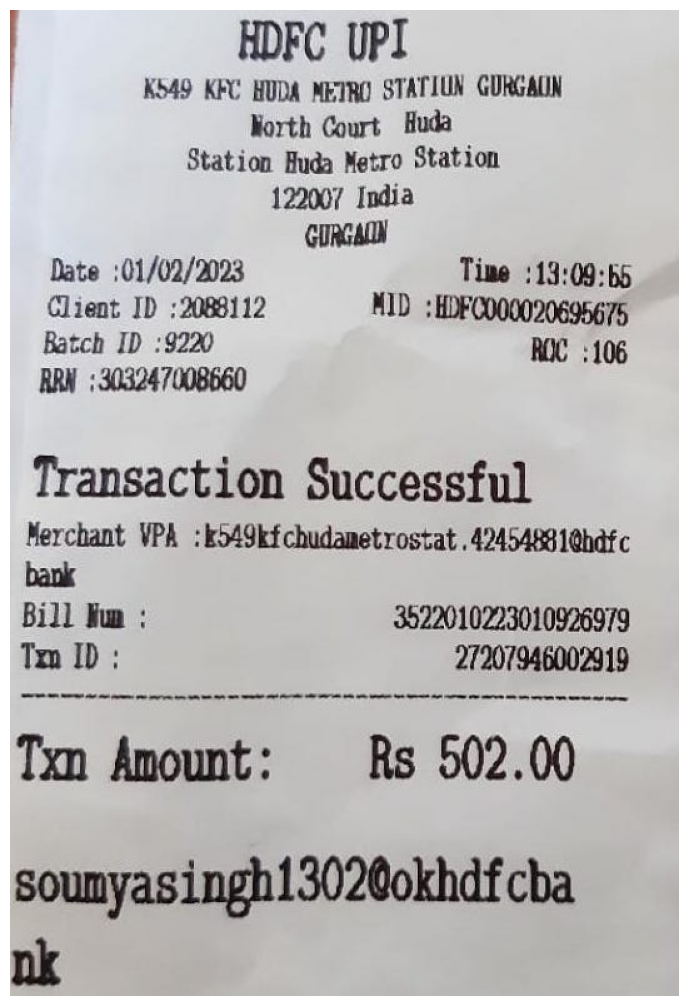

In [4]:
display(image_file)

In [5]:
image = cv2.imread("ocr test.jpeg")
base_image = image.copy()

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [7]:
#morphological operations
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 50))
dilate = cv2.dilate(thresh, kernal, iterations=1)

In [8]:
cv2.imwrite("1.jpeg", dilate)

True

In [9]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[1])

In [10]:
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h > 200 and w > 250:
        roi = base_image[y:y+h, x:x+w]
        cv2.rectangle(image, (x,y), (x+w, y+h), (36, 255, 12), 2)

cv2.imwrite("sample_crop3.png", image)

True

In [11]:
import pytesseract
ocr_result_original = pytesseract.image_to_string(base_image)

In [12]:
print(ocr_result_original)


HDFC UPI
K549 KFC HUDA METRO STATIUN GURGAUN
Worth Court Huda
Station Huda Metro Station
122007 India
GORGALD
Date :01/02/2023 Time 11:09:65
Client ID ;2088112 MID ; HDFCO00020695675
Batch ID :9220 ROC :106
ARN ; 303247008660

Transaction Successful
Merchant VPA :k549kfchudametrostat .42454881@hafc

bank

Bill Hua : 3522010223010926979
ii <—
Txn Amount: Rs 502.00
sounyasingh1302@okhdfcba

nk

